## HT6 - Proyecto 2. Entrega 4
### KNN
Diego Duarte 22075 - José Marchena 22398

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import regression
#Importar Datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
house_prices=pd.read_csv("train.csv")

## Modelo de Regresión KNN

Limpieza de datos y especificacion de nuestro y, siendo este la columna SalePrice del conjunto de datos.

In [4]:
X = regression.drop_many_nulls(house_prices).dropna()
X["SalePrice"] = np.log(X["SalePrice"])
y = X.pop("SalePrice")

Train/test, usando random_state=42, como la division utilizada en todos los modelos anteriores

In [5]:
X_trainR, X_testR,y_trainR, y_testR = train_test_split(X, y,test_size=0.3,train_size=0.7,random_state=42)
print(X_trainR.shape)
print(X_testR.shape)
print(y_trainR.shape)
print(y_testR.shape)

(770, 57)
(330, 57)
(770,)
(330,)


Preprocesador para datos: numericos -> normalizacion; categoricos -> oneHotEncode

In [6]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
print(categorical_columns)
print(numerical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold']


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standar-scaler', numerical_preprocessor,numerical_columns)
    ])

Pipeline para encontrar el mejor k numero de vecinos

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Crear pipeline con KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Definir hiperparámetros a optimizar en la búsqueda
param_grid = {
    'knn__n_neighbors': np.arange(1,20),  # Diferentes valores de k
}
# Validación cruzada con 5 folds y GridSearch
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_trainR, y_trainR)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'Condition2',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofStyle',
                                                                          'RoofMatl',
                                                                          'Exterior1st',
                                                                          'Exterior2nd',
                                                                          'E...
                                                                          'YearRemodAdd',
                                                                          'TotalBsmtSF',
                                                                          '1stFlrSF',
                                                                          'GrLivArea',
                                                                          'BsmtFullBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='neg_mean_squared_error')

In [9]:
best_knn = grid_search.best_estimator_
print(f"Mejor hiperparámetro: {grid_search.best_params_}")

Mejor hiperparámetro: {'knn__n_neighbors': 5}


In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluación en el conjunto de prueba
y_predR = best_knn.predict(X_testR)
regression.performance_metrics(y_testR, y_predR)


RMSE en test: 0.1528052516029108
MAE en test: 0.11025569699580386
MSE en test: 0.02334944491742888
R² en test: 0.8526691217785981


In [11]:
y_predR_exp = np.exp(y_predR)
y_testR_ex = np.exp(y_testR)
regression.performance_metrics(y_testR_ex, y_predR_exp)

RMSE en test: 39439.019797057306
MAE en test: 21697.772135928582
MSE en test: 1555436282.5526779
R² en test: 0.8108095012225416


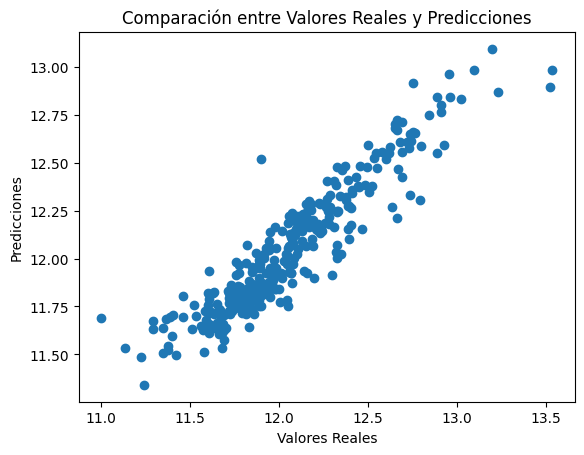

In [12]:
plt.scatter(y_testR, y_predR)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Valores Reales y Predicciones")
plt.show()

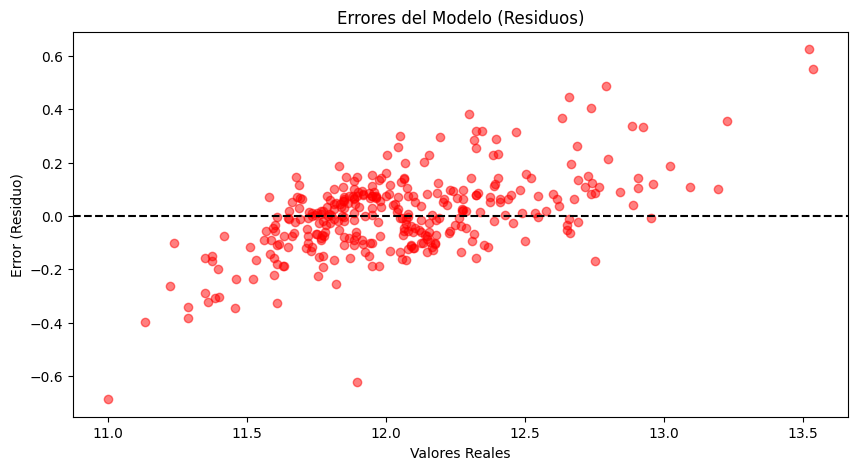

In [13]:
plt.figure(figsize=(10,5))
residuals = y_testR - y_predR
plt.scatter(y_testR, residuals, alpha=0.5, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Error (Residuo)")
plt.title("Errores del Modelo (Residuos)")
plt.show()

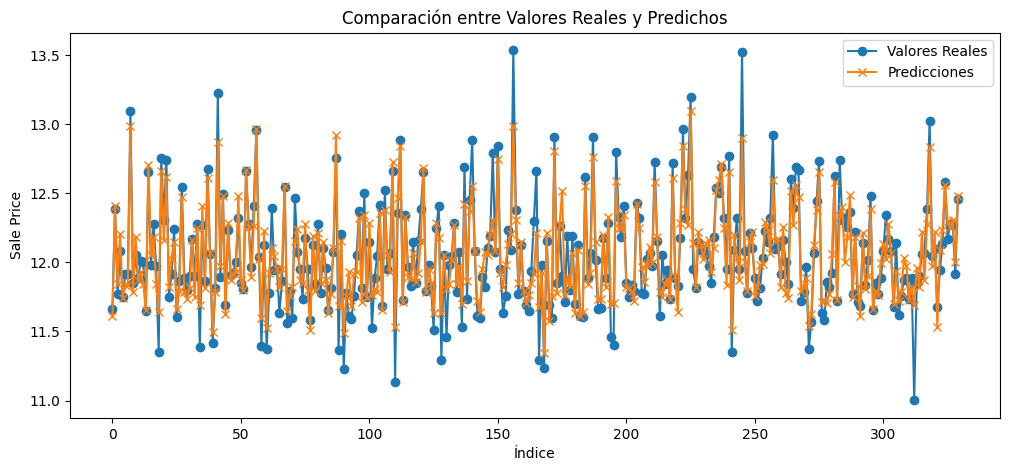

In [14]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_testR)), y_testR.values, label="Valores Reales", marker='o')
plt.plot(range(len(y_predR)), y_predR, label="Predicciones", marker='x')
plt.xlabel("Índice")
plt.ylabel("Sale Price")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()

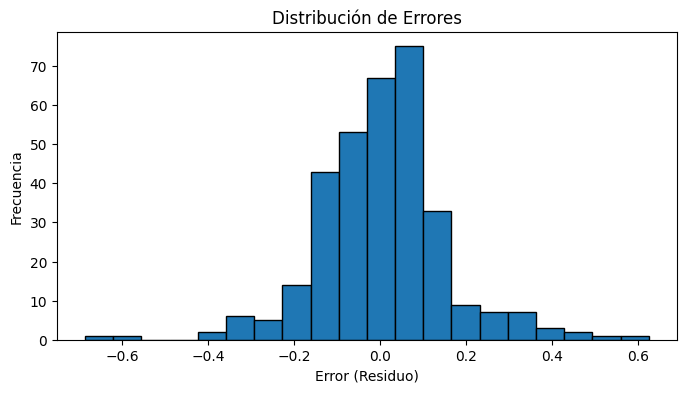

In [15]:
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()

## Modelo de Clasificación KNN

In [16]:
import classification
data_clean = classification.trans_categorical(house_prices)
data_knnC = classification.sale_price_replace(
    regression.drop_many_nulls(data_clean)
)
data_knnC = data_knnC.dropna()
print(data_knnC.dtypes) 



MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
ExterQual          int64
Foundation         int32
BsmtQual         float64
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinType2       int32
TotalBsmtSF        int64
Heating            int32
HeatingQC          int64
CentralAir         int32
Electrical         int32
1stFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64


c:\Users\JM\Documents\Data Mining\KNN\classification.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = km.fit_predict(X_pca)


In [17]:
y_knnC = data_knnC.pop('SpThird')

X_knnC = data_knnC
X_trainC, X_testC, y_trainC, y_testC = train_test_split(
    X_knnC, y_knnC, test_size=0.3, train_size=0.7, random_state=42
)
print(X_trainC.shape)
print(X_testC.shape)
print(y_trainC.shape)
print(y_testC.shape)

(788, 57)
(339, 57)
(788,)
(339,)


In [18]:
scaler = StandardScaler()
X_trainC = scaler.fit_transform(X_trainC)
X_testC = scaler.transform(X_testC)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

accuracies = []
price_scores = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')
    knn.fit(X_trainC, y_trainC)
    scores = cross_val_score(knn, X_trainC, y_trainC, cv=5, scoring='accuracy')
    price_scores.append(np.mean(scores))
    y_pred = knn.predict(X_testC)
    accuracies.append(accuracy_score(y_testC, y_pred))

In [20]:
import math
print("Se predice que el numero de K a utilizar es: " + str(math.sqrt(339)))

Se predice que el numero de K a utilizar es: 18.411952639521967


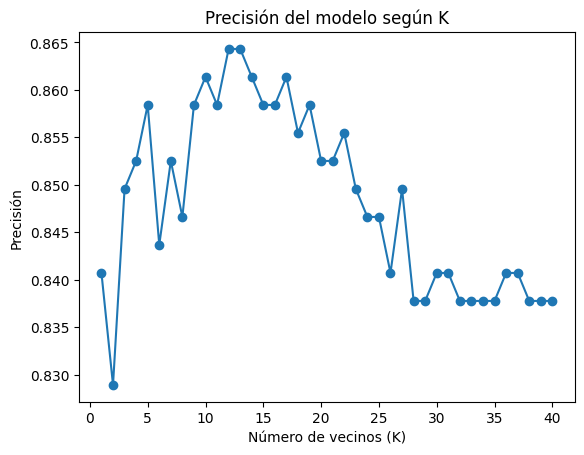

Mejor valor de K según CV=5: 12


In [21]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión')
plt.title('Precisión del modelo según K')
plt.show()

best_k = k_values[np.argmax(accuracies)]  
print(f"Mejor valor de K según CV=5: {best_k}")


In [22]:
knnC1 = KNeighborsClassifier(n_neighbors=18, p=3, metric='euclidean')
knnC1.fit(X_trainC, y_trainC)

KNeighborsClassifier(metric='euclidean', n_neighbors=18, p=3)

Precisión del modelo: 0.86
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       122
           1       0.91      0.93      0.92       179
           2       0.90      0.47      0.62        38

    accuracy                           0.86       339
   macro avg       0.86      0.76      0.79       339
weighted avg       0.86      0.86      0.85       339



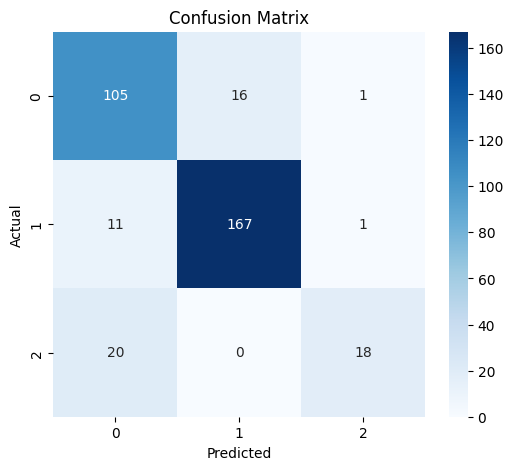

In [23]:
y_predC1 = knnC1.predict(X_testC)

classification.metrics_and_cm(y_predC1, y_testC)

In [24]:
knnC2 = KNeighborsClassifier(n_neighbors=12, p=3, metric='euclidean')
knnC2.fit(X_trainC, y_trainC)

KNeighborsClassifier(metric='euclidean', n_neighbors=12, p=3)

Precisión del modelo: 0.86
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       122
           1       0.92      0.93      0.93       179
           2       0.91      0.53      0.67        38

    accuracy                           0.86       339
   macro avg       0.87      0.78      0.81       339
weighted avg       0.87      0.86      0.86       339



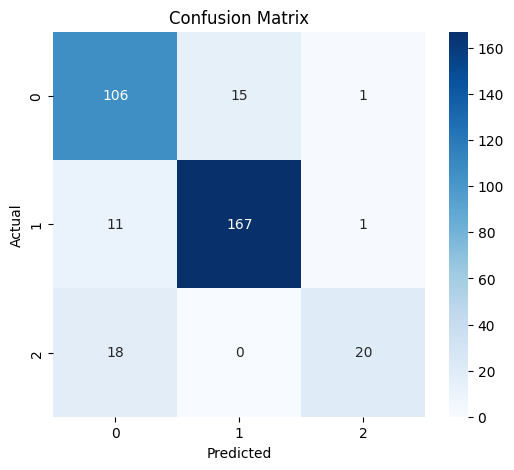

In [25]:
y_predC2 = knnC2.predict(X_testC)
classification.metrics_and_cm(y_predC2, y_testC)

## Modelo con validación cruzada

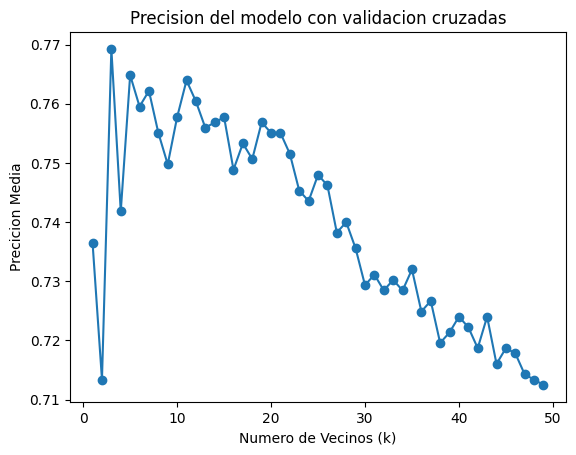

Mejor k: 3 con precision 0.7693
Precision promedio del modelo: 0.7692664700098328
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       401
           1       0.87      0.81      0.84       620
           2       0.65      0.57      0.61       106

    accuracy                           0.77      1127
   macro avg       0.73      0.71      0.72      1127
weighted avg       0.78      0.77      0.77      1127



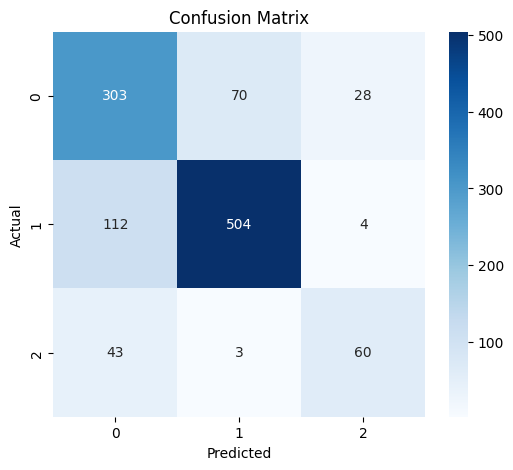

In [26]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, precision_score
import seaborn as sns

k_values = range(1, 50)
cv_accuracies = []

# Loop over different values of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_knnC, y_knnC, cv=5, scoring="accuracy")
    cv_accuracies.append(scores.mean())
best_k = k_values[np.argmax(cv_accuracies)]

plt.plot(k_values, cv_accuracies, marker="o")
plt.xlabel("Numero de Vecinos (k)")
plt.ylabel("Precicion Media")
plt.title("Precision del modelo con validacion cruzadas")
plt.show()

print(f"Mejor k: {best_k} con precision {max(cv_accuracies):.4f}")
cv_knn = KNeighborsClassifier(n_neighbors=best_k)
cv_scores = cross_val_score(cv_knn, X_knnC, y_knnC, cv=5, scoring="accuracy")
ct_ypred = cross_val_predict(cv_knn, X_knnC, y_knnC, cv=5)

print("Precision promedio del modelo:", cv_scores.mean())
print(classification_report(y_knnC, ct_ypred))
cm = confusion_matrix(y_knnC, ct_ypred)

# Matriz de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_knnC), yticklabels=np.unique(y_knnC))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Optimizacion de paramteros
Se optimizara para los parametros de knn__weights y knn__p ademas de la cantidad de vecinos

### Regresion

In [27]:
knnR_tuning = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])
param_grid = {
    'knn__n_neighbors': np.arange(1,20),  # Diferentes valores de k
    'knn__weights': ['uniform', 'distance'],  # Peso de los vecinos
    'knn__p': [1, 2]  # Distancia Manhattan (p=1) vs Euclidiana (p=2)
}
grid_search = GridSearchCV(knnR_tuning, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_trainR, y_trainR)
best_knnR = grid_search.best_estimator_
print(f"Mejor hiperparámetro: {grid_search.best_params_}")


Mejor hiperparámetro: {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'}


In [28]:
y_predR2 = best_knnR.predict(X_testR)
regression.performance_metrics(y_testR, y_predR2)
regression.performance_metrics(np.exp(y_testR), np.exp(y_predR2))


RMSE en test: 0.1509153467927988
MAE en test: 0.10872205105479922
MSE en test: 0.022775441897590724
R² en test: 0.8562909795706592
RMSE en test: 38718.671632360696
MAE en test: 21382.960452042917
MSE en test: 1499135532.9745727
R² en test: 0.8176574621539567


### Clasificacion

In [29]:
knn_pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'knn__n_neighbors': np.arange(1,20),  # Diferentes valores de k
    'knn__weights': ['uniform', 'distance'],  # Peso de los vecinos
    'knn__p': [1, 2]  # Distancia Manhattan (p=1) vs Euclidiana (p=2)
}
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_trainC, y_trainC)
best_knn = grid_search.best_estimator_
print(f"Mejor hiperparámetro: {grid_search.best_params_}")


Mejor hiperparámetro: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}


In [30]:
y_predC3 = best_knn.predict(X_testC)

Precisión del modelo: 0.88
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       122
           1       0.90      0.96      0.93       179
           2       0.90      0.68      0.78        38

    accuracy                           0.88       339
   macro avg       0.88      0.82      0.85       339
weighted avg       0.88      0.88      0.88       339



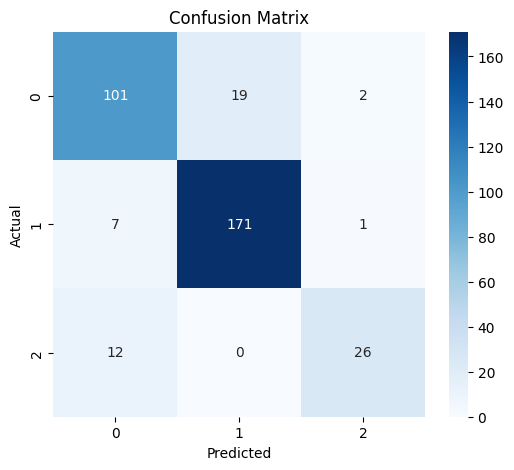

In [31]:
y_predC3 = best_knn.predict(X_testC)
classification.metrics_and_cm(y_predC3, y_testC)

### Tiempo

In [ ]:
import time
times = []
for i in range(0,1000):
    start_time = time.time()
    y_predC3 = best_knn.predict(X_testC)
    times.append(time.time() - start_time)
print(np.mean(times))

0.012568841218948364
